# 1. Loading the Data

First, import the necessary libraries and load the dataset into a DataFrame.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/refs/heads/main/Dataset/Liver-Disease%20Project%20dataset.csv')

df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


#2.Understanding the Data Structure

*Shape of the Data*

In [127]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

#or

#df.shape

The dataset contains 615 rows and 13 columns.


In [128]:
df.columns.values

array(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase',
       'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '], dtype=object)

*First Few Rows*

In [129]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [130]:
df['category'].value_counts()

,count
category,
no_disease,533
cirrhosis,30
hepatitis,24
fibrosis,21
suspect_disease,7


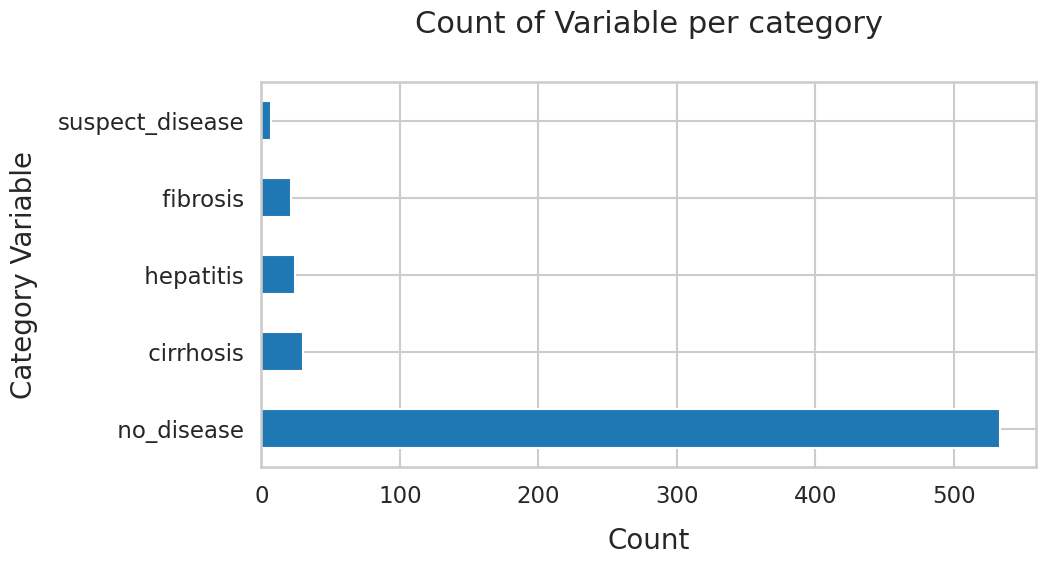

In [131]:
df['category'].value_counts().plot(kind='barh', figsize=(10, 5)) #the plot function when using kind='barh' for horizontal bar plots.
plt.xlabel("Count", labelpad=14)
plt.ylabel("Category Variable", labelpad=14)
plt.title("Count of Variable per category", y=1.02);

*Data Types and Non-Null Counts*

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [133]:
# Convert the 'protein   ' column to numeric, handling errors
df['protein   '] = pd.to_numeric(df['protein   '], errors='coerce')

# Fill NaN values with the mean of the numeric values
df['protein   '].fillna(df['protein   '].mean(), inplace=True)

**Statistical Summary**

*Descriptive Statistics for Numerical Columns*

In [134]:
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.398234
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


*Descriptive Statistics for Categorical Columns*

In [135]:
#df.describe(include='object')    # Or

df.describe(include=['object'])

,category,sex
count,615,615
unique,5,2
top,no_disease,m
freq,533,377


In [136]:
#df.boxplot(figsize=(20,10))
#plt.show()

In [137]:
from sklearn.preprocessing import StandardScaler

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True) # drop_first avoids multicollinearity

sc = StandardScaler()

x = sc.fit_transform(df_encoded)
x

array([[-1.53361617, -0.54020751, -0.60692194, ...,  0.39223227,
        -0.10729938,  0.79454373],
       [-1.53361617, -0.54020751,  0.07752215, ...,  0.39223227,
        -0.10729938,  0.79454373],
       [-1.53361617,  0.91410623,  0.24671058, ...,  0.39223227,
        -0.10729938,  0.79454373],
       ...,
       [ 1.65143725, -2.1849671 ,  0.73120471, ..., -2.54950976,
        -0.10729938, -1.25858397],
       [-0.1401553 , -1.49243674,         nan, ..., -2.54950976,
        -0.10729938, -1.25858397],
       [ 1.15377266, -0.97303898,         nan, ..., -2.54950976,
        -0.10729938, -1.25858397]])

#3.Handling Missing Values

*Counting Missing Values per Column*

In [138]:
df.isnull().sum()

,0
category,0
age,0
sex,0
albumin,1
alkaline_phosphatase,18
alanine_aminotransferase,1
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,10


*Drop Missing Values*

In [139]:
#df.dropna(inplace=True)

**Impute Missing Values**

*For Numerical Columns*

In [140]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['albumin'] = imputer.fit_transform(df[['albumin']])
df['alkaline_phosphatase'] = imputer.fit_transform(df[['alkaline_phosphatase']])
df['alanine_aminotransferase'] = imputer.fit_transform(df[['alanine_aminotransferase']])
df['cholesterol'] = imputer.fit_transform(df[['cholesterol']])

*For Categorical Columns*

In [141]:
#df['category'].fillna(df['category'].mode()[0], inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      615 non-null    float64
 4   alkaline_phosphatase         615 non-null    float64
 5   alanine_aminotransferase     615 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  615 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    float64
dtypes: float64(10), int6

In [143]:
df.isnull().sum()

,0
category,0
age,0
sex,0
albumin,0
alkaline_phosphatase,0
alanine_aminotransferase,0
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,0


#4.Data Cleaning

*Standardizing Column Names*

*Renaming Columns*

In [144]:
#df.columns = df.columns.str.lower().str.replace(' ', '_')

**Correcting Data Types**

*Converting 'sex' to Categorical*

In [145]:
#df['sex'] = df['sex'].astype('category')

**Encoding Categorical Variables**

*Label Encoding*

In [146]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

*One-Hot Encoding*

In [147]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [148]:
df

,category,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,category_encoded,sex_m
0,no_disease,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,3,True
1,no_disease,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,3,True
2,no_disease,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,3,True
3,no_disease,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,3,True
4,no_disease,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,False
611,cirrhosis,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,False
612,cirrhosis,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0,False
613,cirrhosis,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0,False


In [149]:
df['category'].value_counts()

,count
category,
no_disease,533
cirrhosis,30
hepatitis,24
fibrosis,21
suspect_disease,7


In [150]:
df['category_encoded'].value_counts(), sorted(df['category_encoded'].unique())

(category_encoded
 3    533
 0     30
 2     24
 1     21
 4      7
 Name: count, dtype: int64,
 [0, 1, 2, 3, 4])

In [151]:
df['sex_m'].value_counts()

,count
sex_m,
True,377
False,238


#5.Exploratory Visualizations

**1. Univariate Analysis**

*Histogram*

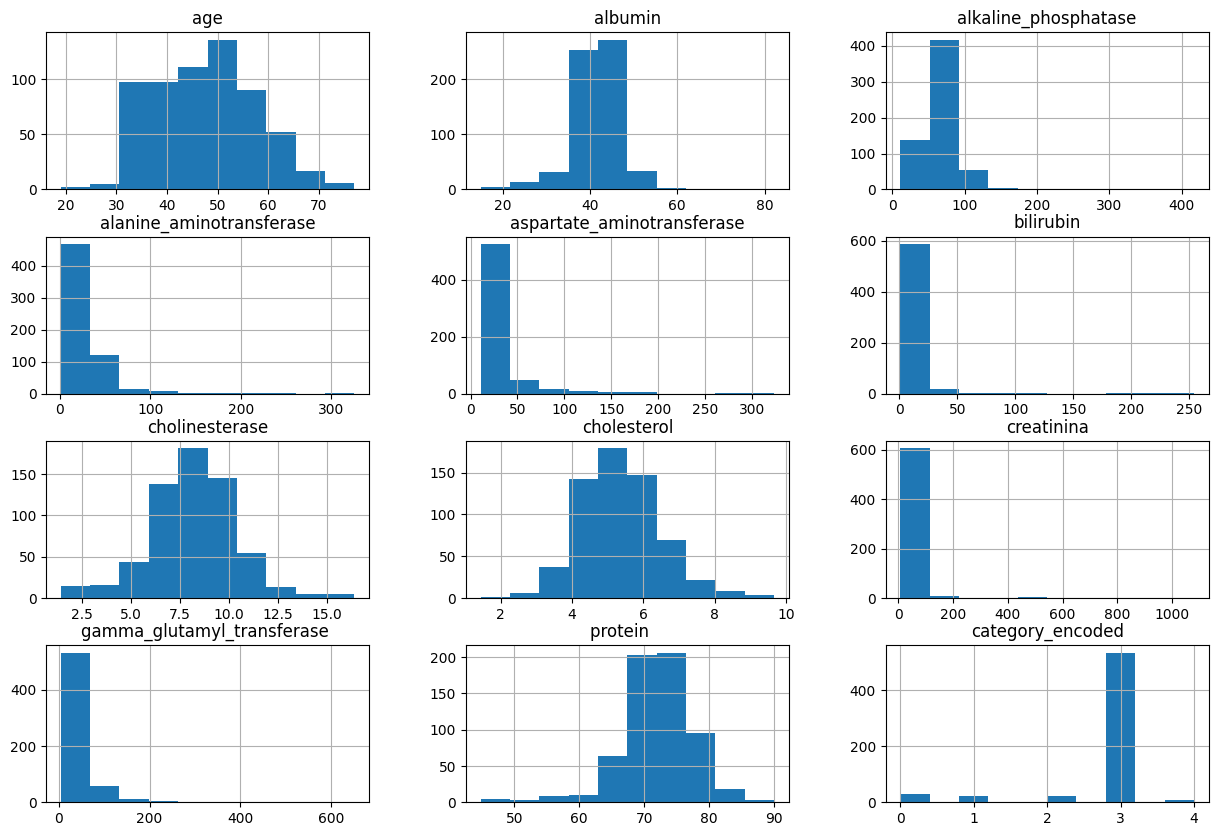

In [88]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(15, 10))
plt.show()

In [89]:
df.skewness = df[numerical_cols].skew()
df.skewness

,0
age,0.267134
albumin,-0.176911
alkaline_phosphatase,4.724225
alanine_aminotransferase,5.510574
aspartate_aminotransferase,4.940327
bilirubin,8.385437
cholinesterase,-0.110233
cholesterol,0.378906
creatinina,15.169291
gamma_glutamyl_transferase,5.632734


In [90]:
df.corr = df[numerical_cols].corr()
df.corr

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,category_encoded
age,1.000000,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153665,-0.101460
albumin,-0.197005,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033,0.230179
alkaline_phosphatase,0.168473,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053633,-0.020403
alanine_aminotransferase,-0.006017,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086,0.094373,-0.022386
aspartate_aminotransferase,0.088666,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888,-0.601843
bilirubin,0.032492,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309,-0.497505
cholinesterase,-0.075093,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184,0.349835
cholesterol,0.123978,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546,0.279124
creatinina,-0.022296,-0.001573,0.149554,-0.043025,-0.021387,0.031224,-0.011157,-0.047667,1.000000,0.121003,-0.031693,-0.206598
gamma_glutamyl_transferase,0.153087,-0.155555,0.442262,0.248086,0.491263,0.217024,-0.110345,-0.006828,0.121003,1.000000,-0.011735,-0.405606


*Box Plots*

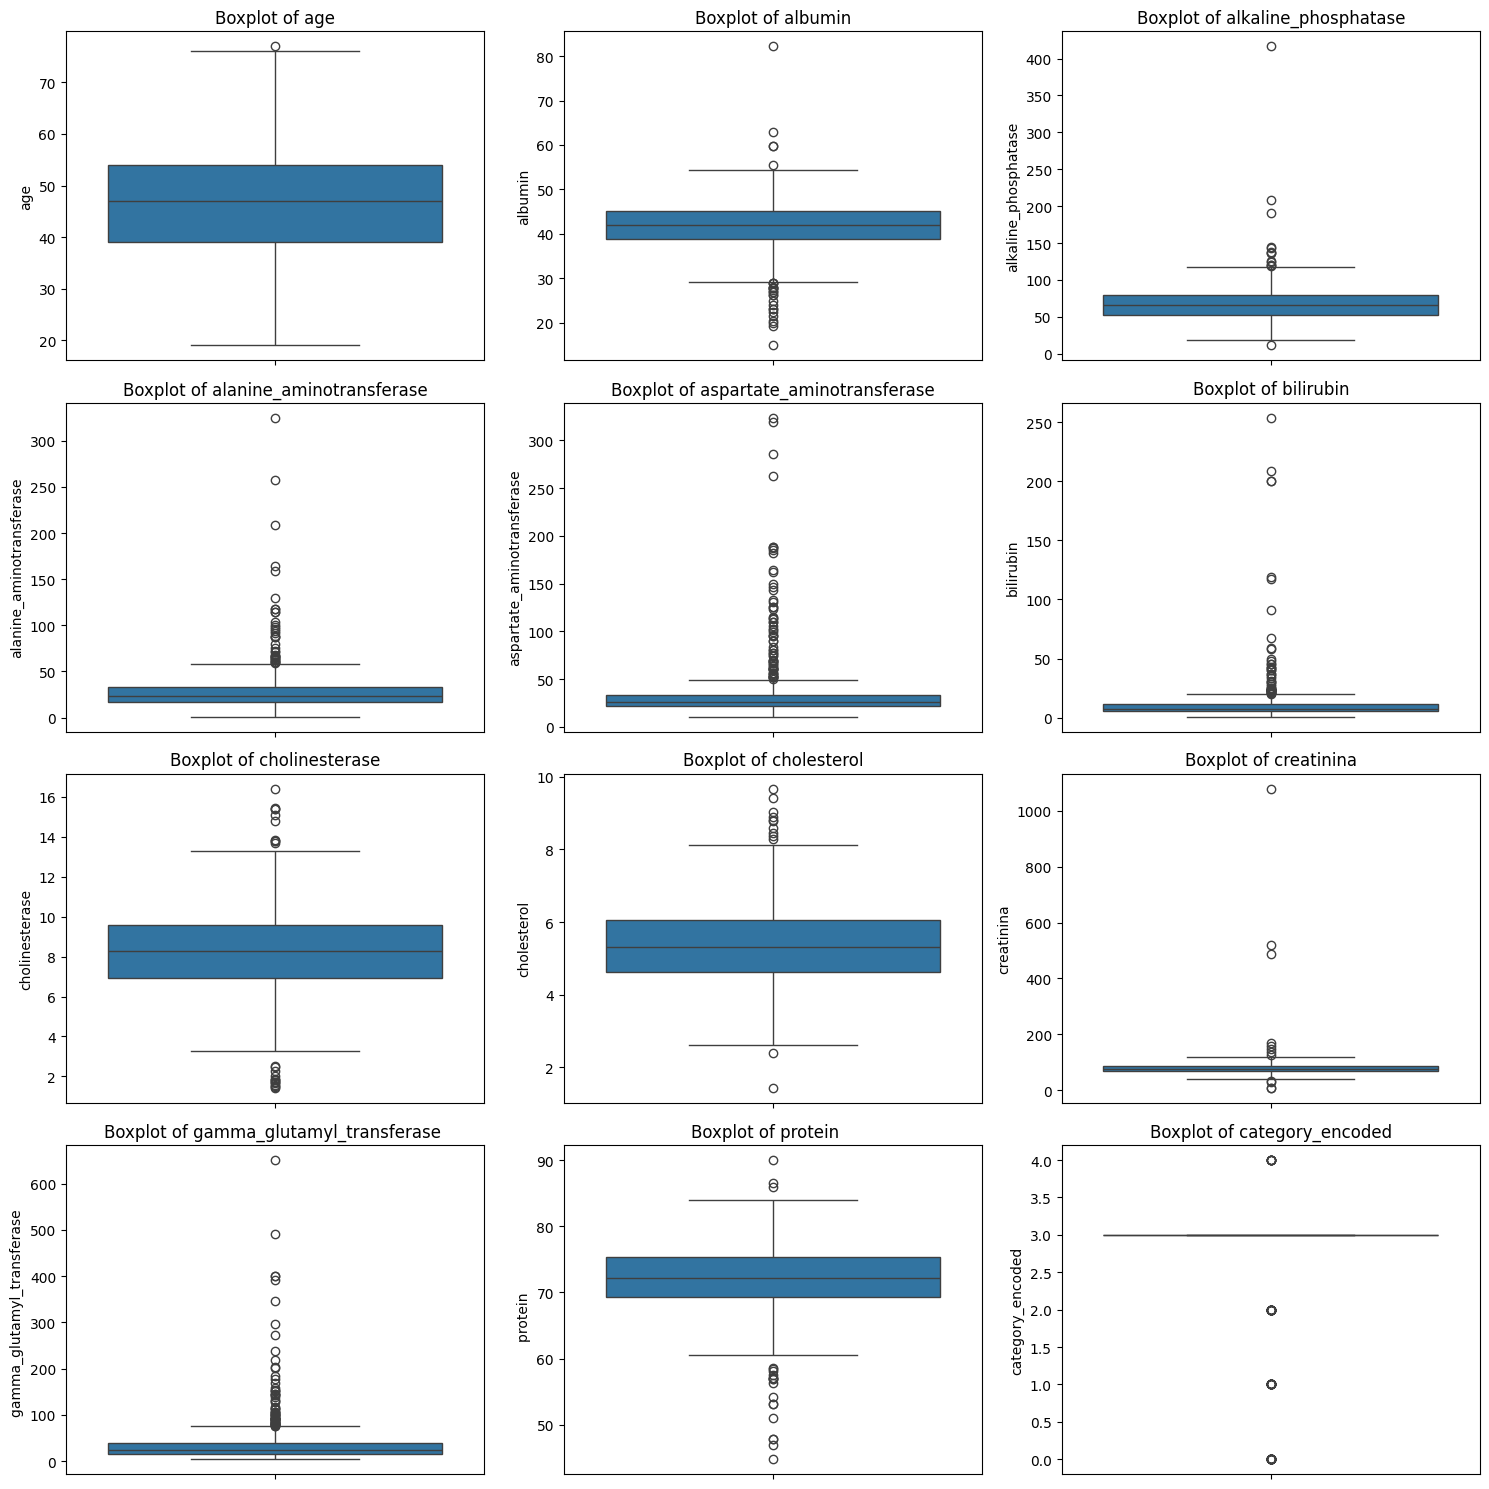

In [95]:
plt.figure(figsize=(15, 15))
data_numeric = df.drop(columns=['category','sex_m'])  # Excluded the 'category' column for outlier detection.
for i, column in enumerate(data_numeric.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

**Relationship between category_encoded and age**

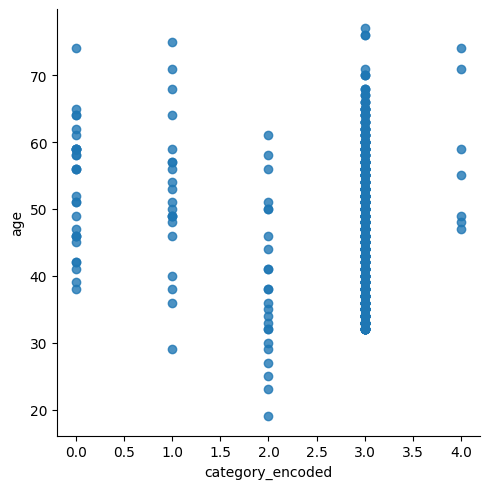

In [98]:
sns.lmplot(data=df, x='category_encoded', y='age', fit_reg=False)
plt.show()

**2. Bivariate Analysis**

*Scatter Plots*

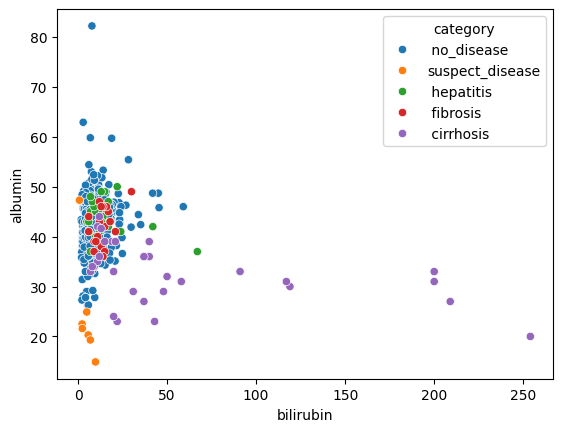

In [101]:
# Check if 'category' column still exists before plotting the scatterplot
if 'category' in df.columns:
    # Now you can plot the scatterplot

    #sns.scatterplot(data=df, x='age', y='bilirubin', hue='category')

    sns.scatterplot(x='bilirubin', y='albumin', hue='category', data=df)

    plt.show()

**3.Multivariate Analysis**

*Pair Plot*

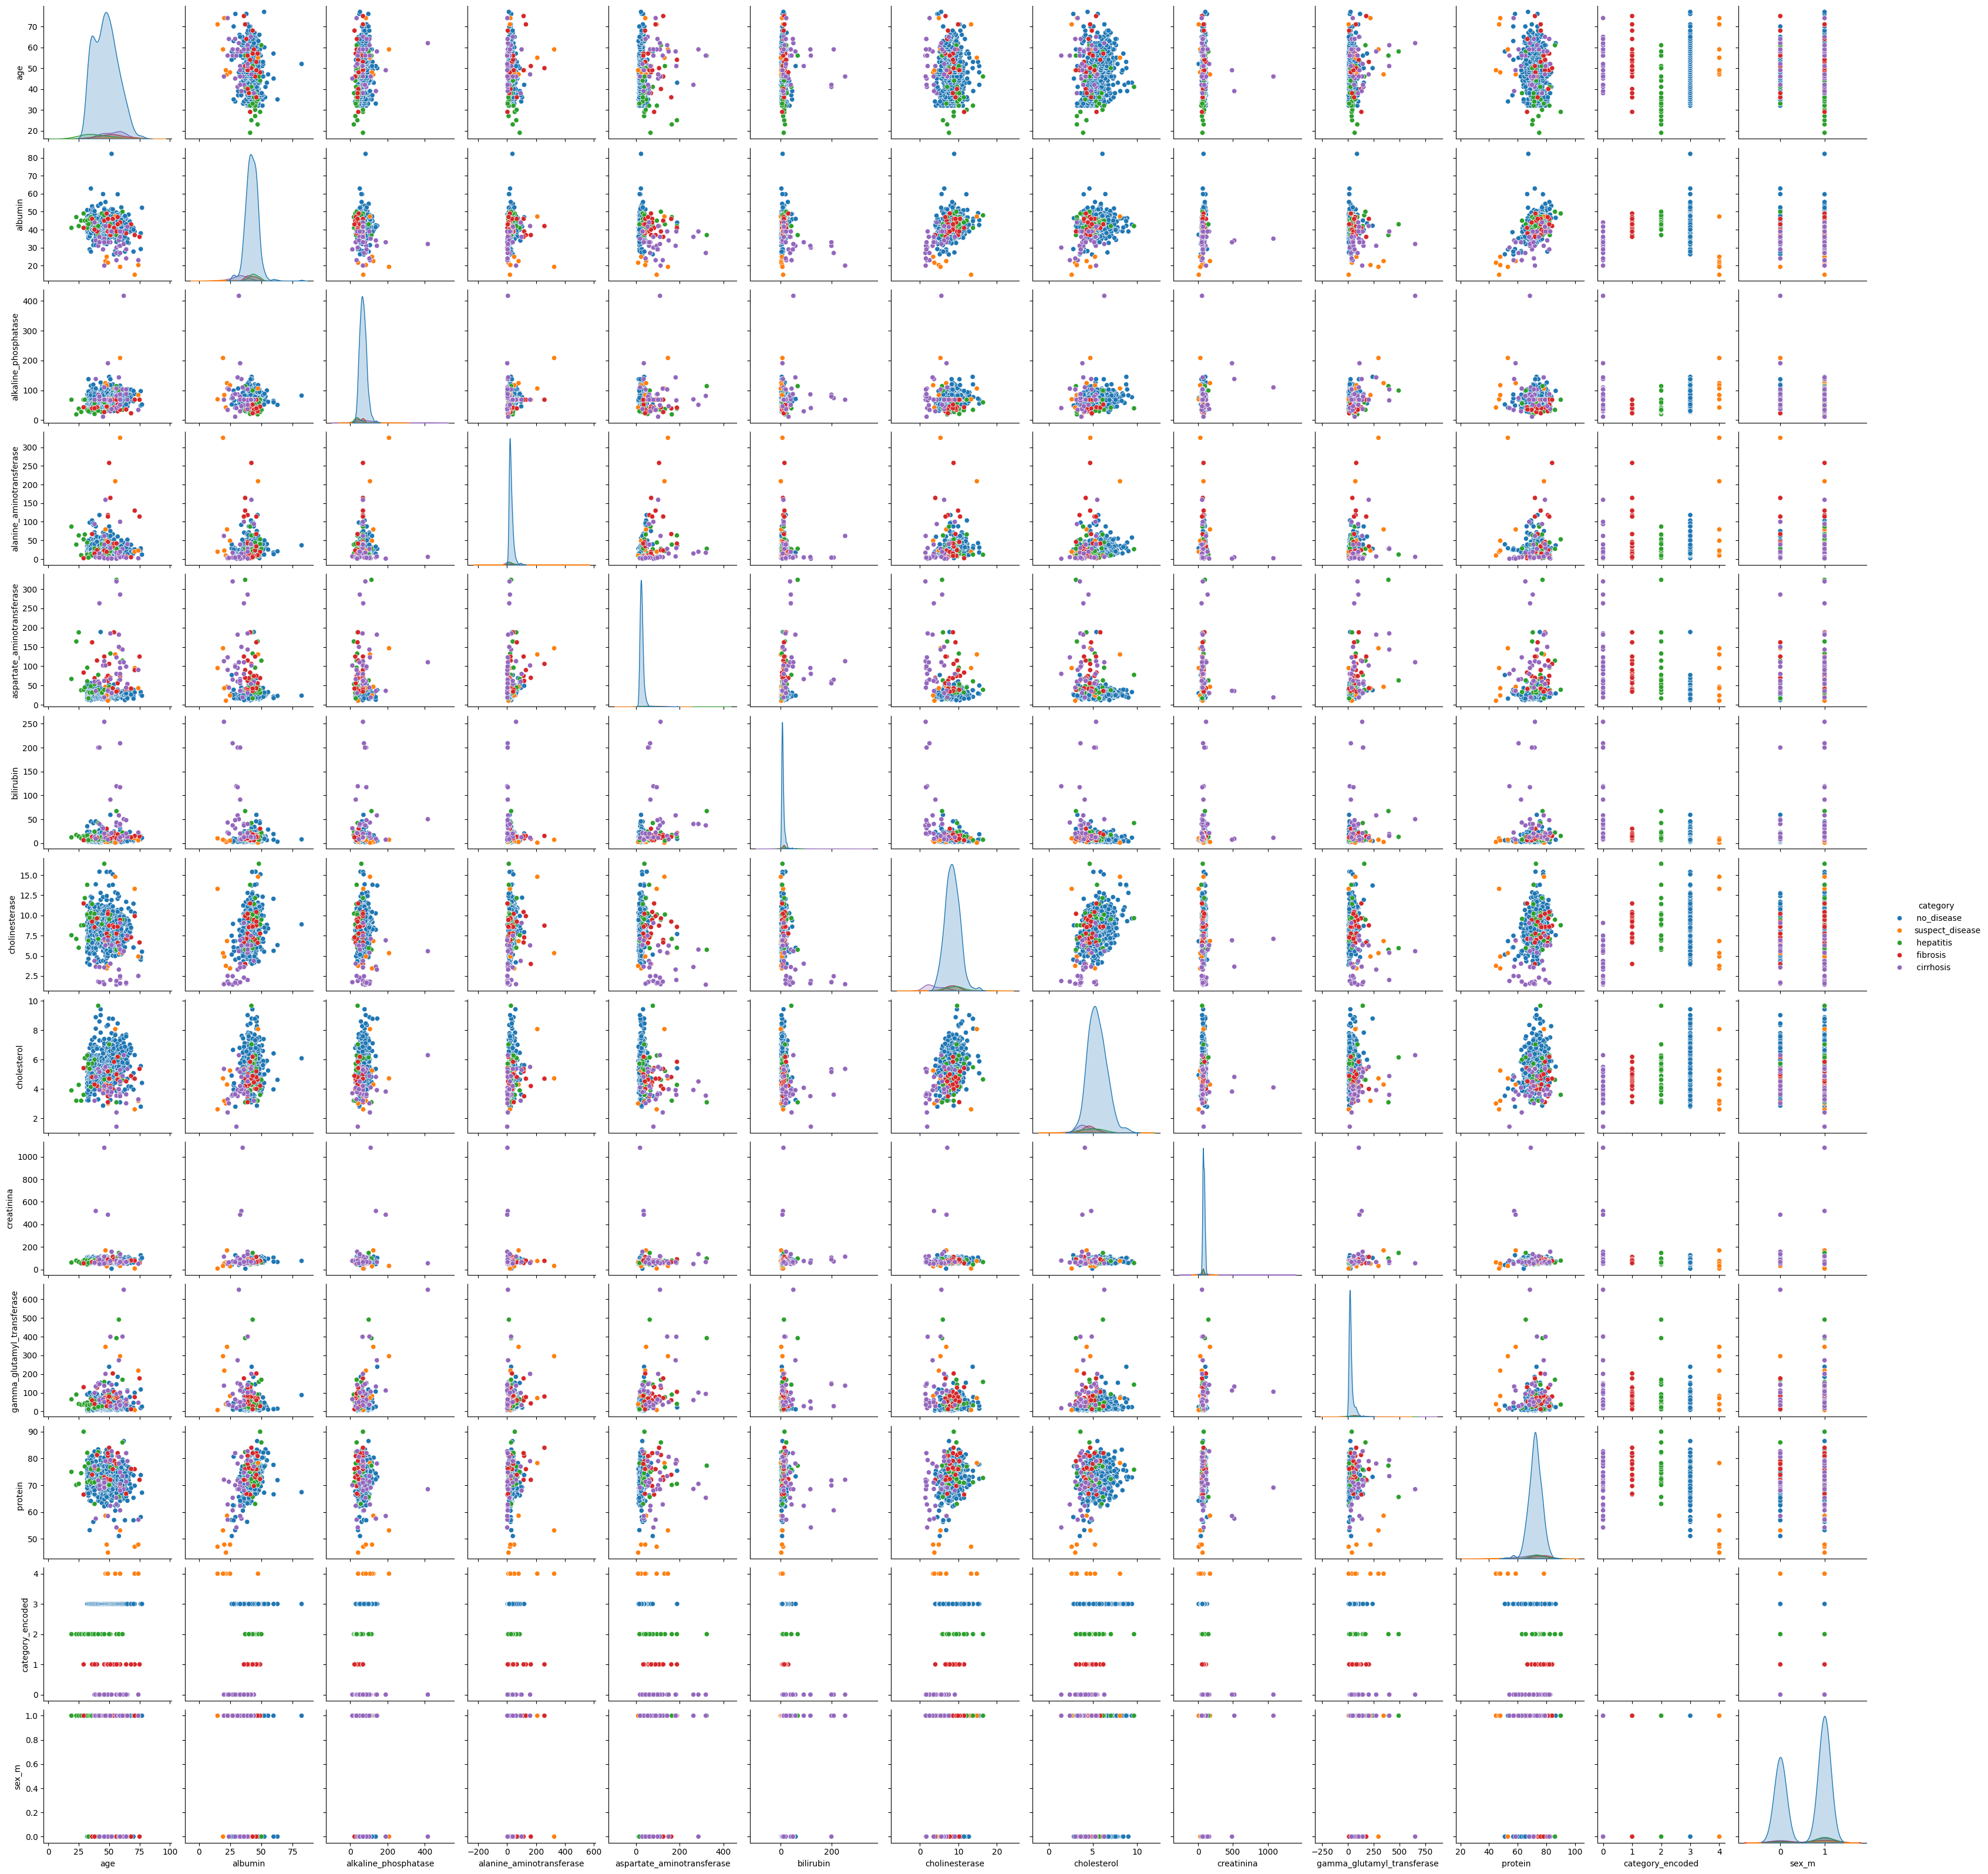

In [102]:
sns.pairplot(df, hue='category')
plt.show()

# 6.Insights from the Data

**Age Distribution: Determine if liver disease prevalence varies with age.**


*Violin Plot*

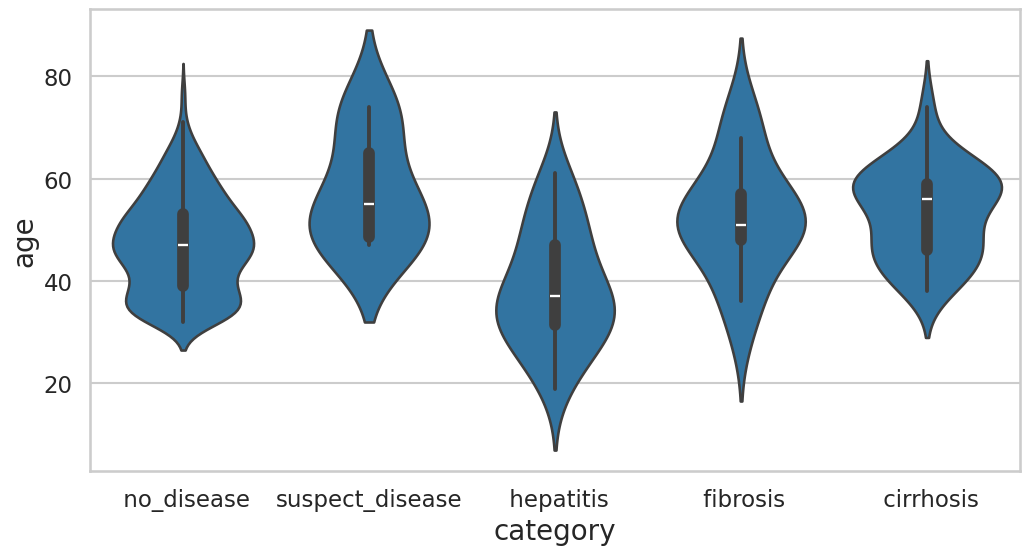

In [108]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='age', data=df)
plt.show()

In [109]:
# Print the column names of your DataFrame to check the actual name of the 'sex' column.
print(df.columns)

Index(['category', 'age', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   ', 'category_encoded',
       'sex_m'],
      dtype='object')


**Gender Distribution: Analyze the distribution of liver disease across genders.**

*Count Plot*

Number of male:  377
Number of female:  238


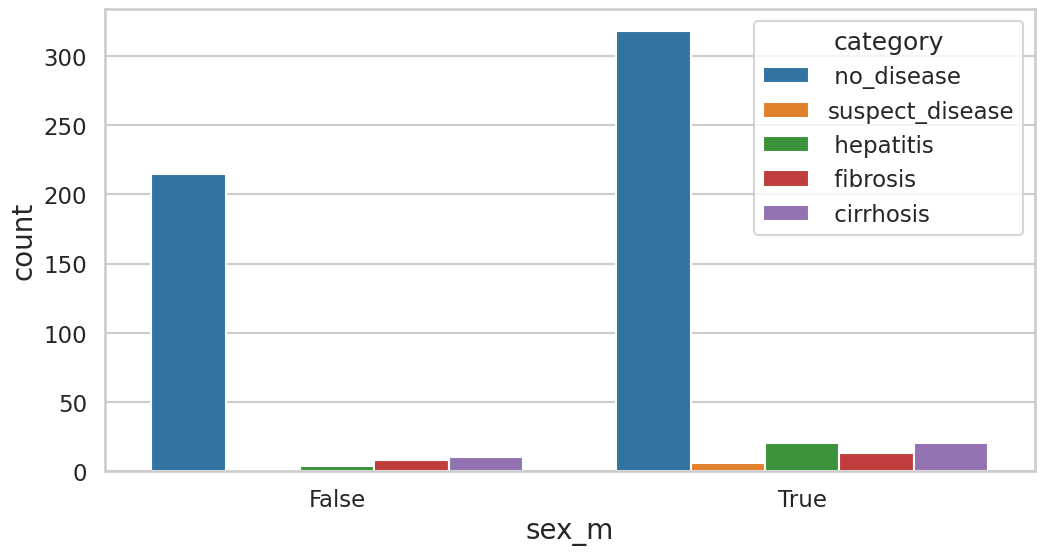

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sex_m', hue='category', data=df)
# Access the 'sex_m' column instead of 'sex'
male, female = df['sex_m'].value_counts()
print('Number of male: ',male)
print('Number of female: ',female)
plt.show()

**Enzyme Levels: Investigate if certain enzyme levels are higher in individuals with liver disease.**

*Box Plot*

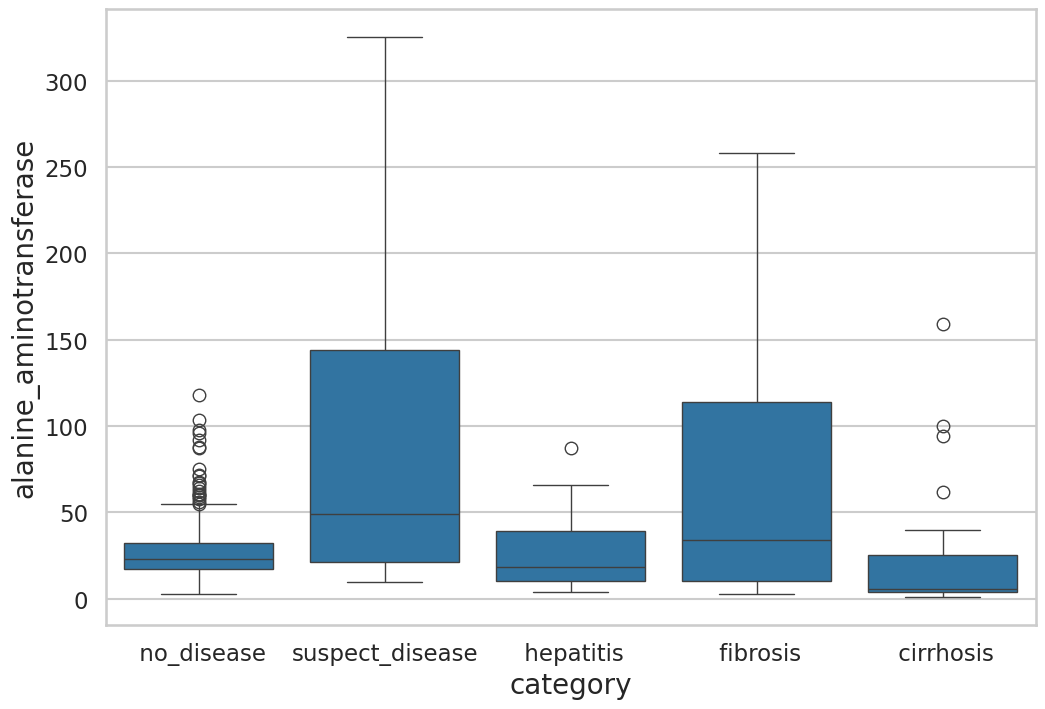

In [115]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='alanine_aminotransferase', data=df)
plt.show()

*Correlation Heatmap*

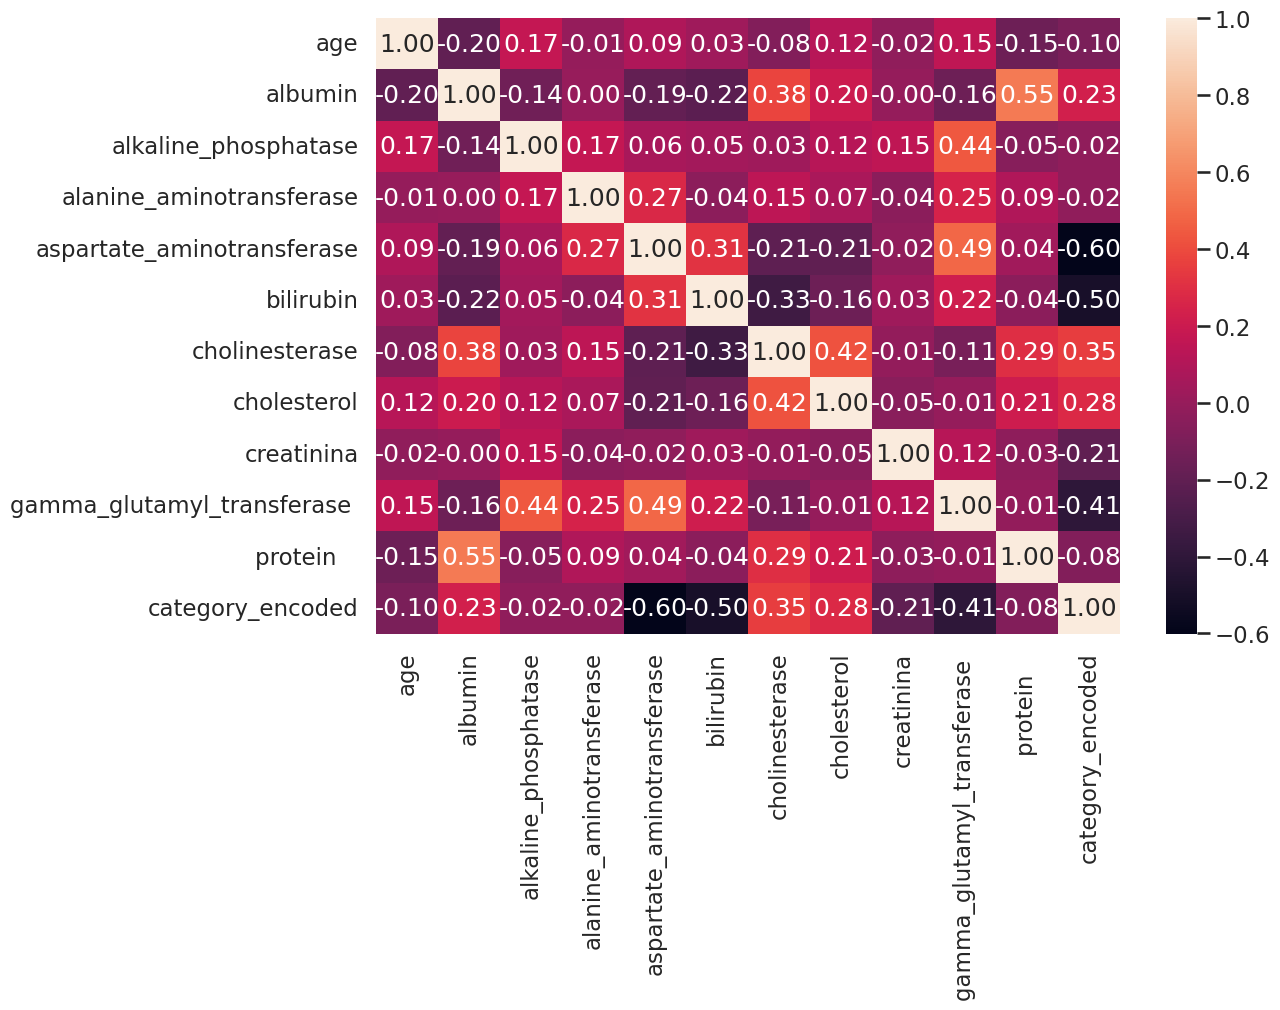

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert columns with 'object' dtype to numerical if possible, excluding 'category'.
# Columns with non-numerical data that can't be converted will be dropped.
for col in df.select_dtypes(include=['object']).columns:
    if col == 'category':  # Skip the 'category' column
        continue
    try:
        # Attempt to convert the column to numeric, handling errors
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Use errors='coerce' to handle invalid values
    except ValueError:
        print(f"Warning: Column '{col}' contains non-numerical data and will be excluded from correlation.")
        df = df.drop(columns=[col])  # Drop the problematic column

# Before calculating correlation, drop non-numeric columns or convert them to numeric
# Drop the category column since it's non-numeric and causes issues with correlation
df_numeric = df.drop(columns=['category','sex_m'])

# Alternatively, If you want to include 'category' in correlation, convert it to numerical using one-hot encoding:
# df_numeric = pd.get_dummies(df, columns=['category'], drop_first=True)

# Calculate and plot the correlation matrix using only numeric data.
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f')
plt.show()

#7.Statistical Analysis
**1.Correlation Analysis**

*Identifying Strong Correlations*

In [117]:
# Before calculating correlation, select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns
df_numeric = df[numeric_cols]  # Create a DataFrame with only numeric columns

# Calculate and plot the correlation matrix using only numeric data.
corr_matrix = df_numeric.corr()  # Calculate correlation for numeric columns only
strong_corrs = corr_matrix[abs(corr_matrix) > 0.5]

In [118]:
corr_matrix

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,category_encoded
age,1.000000,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153665,-0.101460
albumin,-0.197005,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033,0.230179
alkaline_phosphatase,0.168473,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053633,-0.020403
alanine_aminotransferase,-0.006017,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086,0.094373,-0.022386
aspartate_aminotransferase,0.088666,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888,-0.601843
bilirubin,0.032492,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309,-0.497505
cholinesterase,-0.075093,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184,0.349835
cholesterol,0.123978,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546,0.279124
creatinina,-0.022296,-0.001573,0.149554,-0.043025,-0.021387,0.031224,-0.011157,-0.047667,1.000000,0.121003,-0.031693,-0.206598
gamma_glutamyl_transferase,0.153087,-0.155555,0.442262,0.248086,0.491263,0.217024,-0.110345,-0.006828,0.121003,1.000000,-0.011735,-0.405606


**2.Outlier Detection**

*Using Z-Score*

In [119]:
from scipy import stats
import numpy as np

# Assuming 'numerical_cols' is a list of your numerical columns
# Calculate z-scores for each numerical column separately and store in new columns

for col in numerical_cols:
    df[col + '_zscore'] = np.abs(stats.zscore(df[col]))  # Calculate and assign to a new column

# If you need a single 'z_score' column indicating any outlier:
df['z_score'] = df[[col + '_zscore' for col in numerical_cols]].max(axis=1)  # Max z-score across all columns

df_outliers = df[df['z_score'] > 3]  # Now you can filter outliers based on this column

In [120]:
df_outliers

,category,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,...,alanine_aminotransferase_zscore,aspartate_aminotransferase_zscore,bilirubin_zscore,cholinesterase_zscore,cholesterol_zscore,creatinina_zscore,gamma_glutamyl_transferase _zscore,protein _zscore,category_encoded_zscore,z_score
27,no_disease,34,29.0,41.60000,29.1,16.1,4.8,6.82,4.03,62.0,...,0.025530,0.565161,0.335590,0.624646,1.192015,0.387962,0.458344,3.493638,0.321660,3.493638
89,no_disease,39,46.4,102.90000,44.4,26.2,4.1,9.29,8.89,103.0,...,0.627223,0.259690,0.371201,0.496113,3.137404,0.436727,0.447974,0.028896,0.321660,3.137404
108,no_disease,42,45.3,55.30000,31.0,50.0,18.5,15.43,5.88,83.0,...,0.100250,0.460131,0.361357,3.282130,0.456015,0.034440,0.441865,0.065976,0.321660,3.282130
114,no_disease,42,46.9,68.70000,118.1,49.3,20.2,7.93,5.62,86.0,...,3.525576,0.438959,0.447840,0.120985,0.224400,0.094783,0.647547,0.325531,0.321660,3.525576
125,no_disease,43,42.8,76.90000,57.7,33.0,11.3,9.63,9.43,72.0,...,1.150264,0.054027,0.004922,0.650388,3.618450,0.186818,0.297220,0.158674,0.321660,3.618450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,...,0.886841,2.283879,1.963828,1.191832,0.830162,0.514683,11.193789,0.657071,3.661317,13.593832
611,cirrhosis,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,...,1.004820,0.290761,0.437665,3.020439,2.091750,0.367848,0.066521,0.137960,3.661317,3.661317
612,cirrhosis,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,...,0.981225,1.942115,1.862083,2.965989,1.548345,0.293425,0.451636,1.845783,3.661317,3.661317
613,cirrhosis,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,...,0.414861,0.823066,0.437665,2.103866,1.040574,0.589106,0.191642,0.193579,3.661317,3.661317


*Using IQR Method*

In [121]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers only for numerical columns, then use the index to filter the original DataFrame
df_outliers = df[((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [122]:
df_outliers

,category,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,...,alanine_aminotransferase_zscore,aspartate_aminotransferase_zscore,bilirubin_zscore,cholinesterase_zscore,cholesterol_zscore,creatinina_zscore,gamma_glutamyl_transferase _zscore,protein _zscore,category_encoded_zscore,z_score
2,no_disease,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,...,0.304747,0.538767,0.269457,0.291926,0.149747,0.094783,0.115957,1.345212,0.321660,1.533616
5,no_disease,32,41.6,43.30000,18.5,19.7,12.3,9.92,6.05,111.0,...,0.391329,0.456280,0.045950,0.781975,0.607456,0.597642,0.942329,0.362610,0.321660,1.533616
9,no_disease,32,42.4,86.30000,20.3,20.0,35.2,5.46,4.45,81.0,...,0.320542,0.447207,1.210921,1.241744,0.817867,0.005789,0.432710,0.397516,0.321660,1.533616
18,no_disease,33,36.6,57.10000,38.9,40.3,24.9,9.62,5.50,112.0,...,0.410928,0.166758,0.686938,0.645850,0.117501,0.617756,0.218490,0.508753,0.321660,1.434083
22,no_disease,34,42.7,65.30000,46.7,30.3,23.4,10.95,5.06,75.0,...,0.717674,0.135688,0.610630,1.249336,0.274463,0.126475,1.099790,0.545833,0.321660,1.334550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,...,0.886841,2.283879,1.963828,1.191832,0.830162,0.514683,11.193789,0.657071,3.661317,13.593832
611,cirrhosis,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,...,1.004820,0.290761,0.437665,3.020439,2.091750,0.367848,0.066521,0.137960,3.661317,3.661317
612,cirrhosis,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,...,0.981225,1.942115,1.862083,2.965989,1.548345,0.293425,0.451636,1.845783,3.661317,3.661317
613,cirrhosis,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,...,0.414861,0.823066,0.437665,2.103866,1.040574,0.589106,0.191642,0.193579,3.661317,3.661317
